In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn
import itertools
%matplotlib inline

/Users/ZSeaborn/Desktop/Homework/linear-regression/.direnv/python-3.5.0/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("car_data.csv")

#Part 1

In [7]:
car_df = df
car_df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [8]:
car_mileage = car_df[['Mileage']]
car_price = car_df['Price']
regr1 = linear_model.LinearRegression()

In [16]:
regr1.fit(car_mileage, car_price)
print('Variance Score: %.2f' % regr1.score(car_mileage, car_price))
print('Coefficients: \n', regr1.coef_)
print("Intercept: ", regr1.intercept_)

Variance Score: 0.02
Coefficients: 
 [-0.1725205]
Intercept:  24764.5590061


/Users/ZSeaborn/Desktop/Homework/linear-regression/.direnv/python-3.5.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


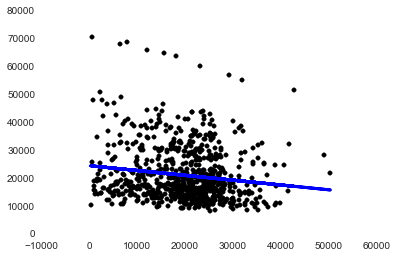

In [12]:
plt.scatter(car_mileage, car_price,  color='black')
plt.plot(car_mileage, regr1.predict(car_mileage), color='blue', linewidth=3)
plt.show()

Using our model, car mileage is a horrible indicator of car price.  We received a variance score of 0.02, which is awful.  Looking at the graph, you can see that our regression line is around the bulk of the data, but the data is still all over the place.  The equation of the regression line is y = (-0.173)x + 24764.559

#Part 2

In [24]:
car2_df = df
car2_df.dropna(inplace=True)

In [26]:
car_factors = car2_df[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]
car_price = car2_df['Price']
regr3 = linear_model.LinearRegression()
regr3.fit(car_factors, car_price)
print('Coefficients: \n', regr3.coef_)
print("Residual sum of squares: %.2f"
      % np.mean((regr3.predict(car_factors) - car_price) ** 2))
print('Variance Score: %.2f' % regr3.score(car_factors, car_price))
print("Intercept: ", regr3.intercept_)

Coefficients: 
 [ -1.69747832e-01   3.79237893e+03  -7.87220732e+02  -1.54274585e+03
   6.28899715e+03  -1.99379528e+03   3.34936162e+03]
Residual sum of squares: 54038388.74
Variance Score: 0.45
Intercept:  6758.7551436


The linear regression equation for Mileage, Cylinders, Doors, Liters, Cruise, Sound, and Leather factors as they affect the price is y = (-1.69747832e-01)x + (3.79237893e+03)x + (-7.87220732e+02)x + (-1.54274585e+03)x + (6.28899715e+03)x + (-1.99379528e+03)x + (3.34936162e+03)x + 6758.755

In [46]:
car3_df = car2_df[['Price', 'Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]

def run_vars_num(num):
    dependent_vars = list(car3_df.columns)
    dependent_vars.remove('Price')
    combos = list(itertools.combinations(dependent_vars, num))
    choices = []
    for combo in combos:
        regr, score = regression_for(combo)
        choices.append((combo, score))
    best = sorted(choices, key=lambda x: x[1])[-1]
    #print(best)
    regr, score = regression_for(best[0])
    #print(regr.coef_, regr.intercept_)
    print(best)
    
def regression_for(combo):
    combo = list(combo)
    df = car3_df.loc[:, combo + ['Price']]
    df.dropna(inplace=True)
    input_data = df[combo]
    price = df['Price']
    regr = linear_model.LinearRegression()
    regr.fit(input_data, price)
    return regr, regr.score(input_data, price)

#for combo in combos:
#    regr, score = regression_for(combo)
#    choices.append((combo, score))

In [47]:
for x in range(1, 8):
    run_vars_num(x)
# the number input will return the number of variables grouped together in combination

(('Cylinder',), 0.32385903759512258)
(('Cylinder', 'Cruise'), 0.38394913240273443)
(('Cylinder', 'Cruise', 'Leather'), 0.40380272693971553)
(('Mileage', 'Cylinder', 'Cruise', 'Leather'), 0.42250742147747633)
(('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Leather'), 0.4369402151237245)
(('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather'), 0.44569092105870245)
(('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'), 0.4462643536728379)


Looking at the above arrays, you can see that no combination of factors will return a reliable model for predicting the price of cars.  Once you reach a combination of 4 factors, you start to se diminishing returns.  The highest variance among the combinatitons of factors is a combination of all the factors, at 0.4463, but even this is a pretty terrible percentage.  I must conclude that based on this data, there is no good model to help determine the price of cars.